## Discribe of the project
- The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
- Value 1 in case of fraud and 0 for unfraud.
- Measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). 

### <font color='blue'> First look at the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isnull().sum().max()

0

In [4]:
df.Class.unique()     

array([0, 1])

In [5]:
print('NonFraud percentage: ',round(df.Class.value_counts()[0]/len(df.Class)*100,2), '%')
print('Fraud percentage: ',round(df.Class.value_counts()[1]/len(df.Class)*100,2), '%')

NonFraud percentage:  99.83 %
Fraud percentage:  0.17 %


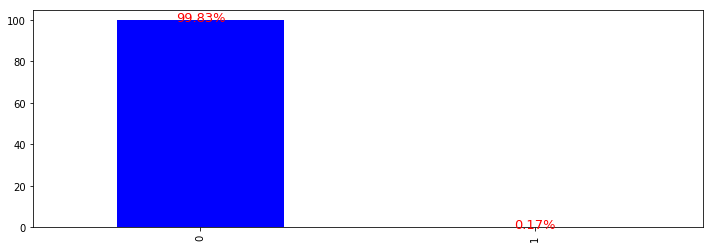

In [6]:
ax = (df.Class.value_counts()/len(df.Class)*100).plot(kind='bar',color='blue',figsize=(12,4))
rects = ax.patches                
for rect in rects:                 
    y_value = rect.get_height()             
    x_value = rect.get_x()                  
    label = "{:.2f}%".format(y_value)
    space = 5

    va = 'top'
    ax.annotate(
        label,                      
        (x_value+0.25, y_value+2),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va,                
        color='red',size=13)   

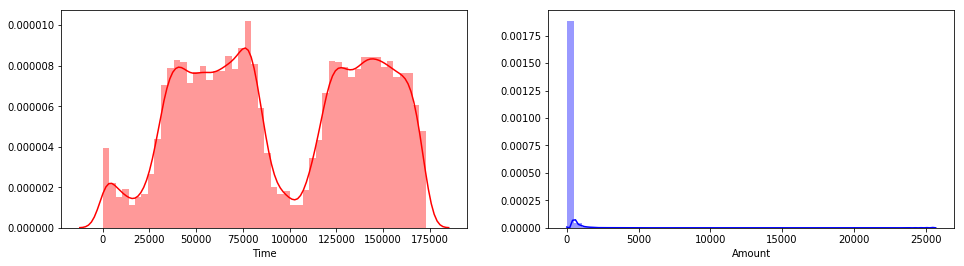

In [7]:
fig,ax = plt.subplots(1,2,figsize=(16,4))

sns.distplot(df['Time'],ax = ax[0], color='r')
sns.distplot(df['Amount'],ax = ax[1], color='b');

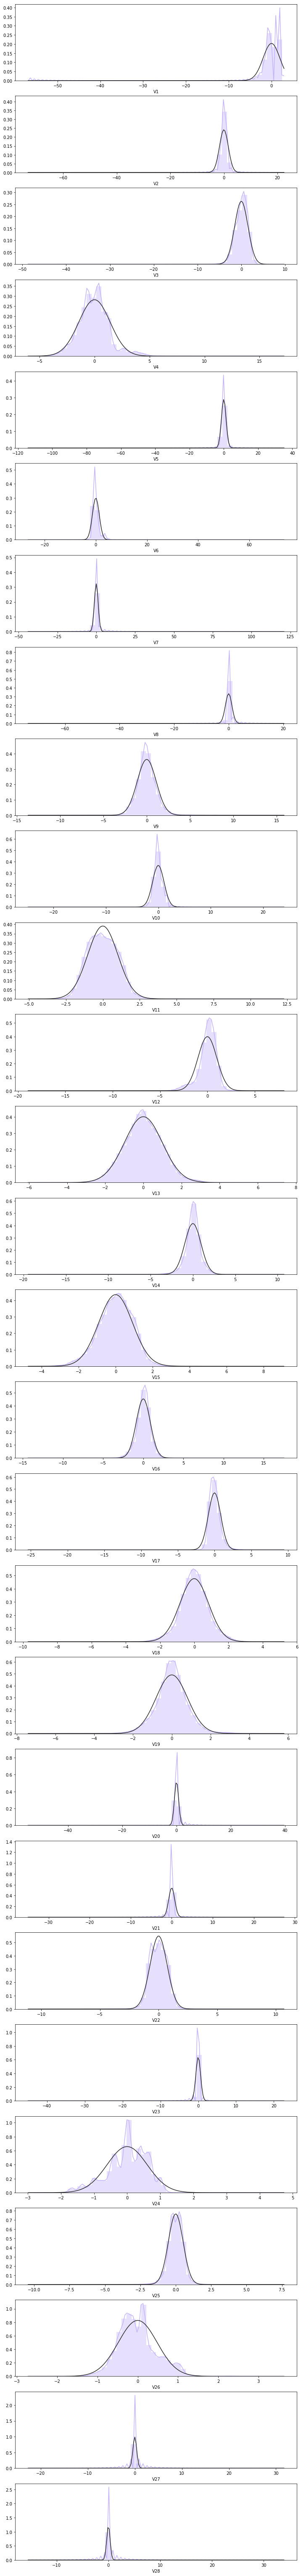

In [8]:
import matplotlib.gridspec as gridspec
from scipy.stats import norm

plt.figure(figsize=(12,29*4))
gs = gridspec.GridSpec(29,1)
i = 0
for feature in df.columns.drop('Time').drop('Amount').drop('Class'):
    i = i+1
    plt.subplot(gs[i])
    sns.distplot(df[feature],bins = 50,fit=norm,color='#C5B3F9')
    
plt.show()

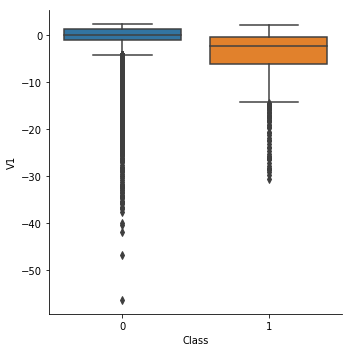

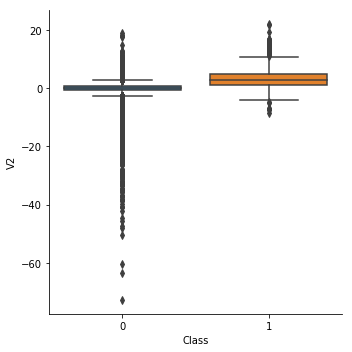

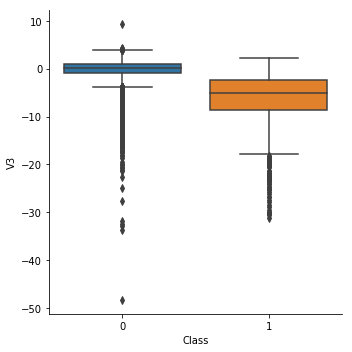

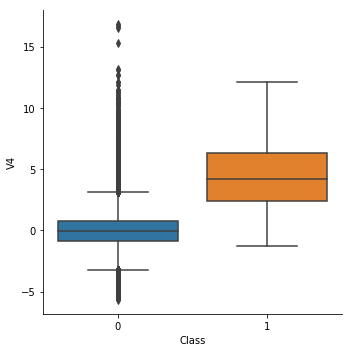

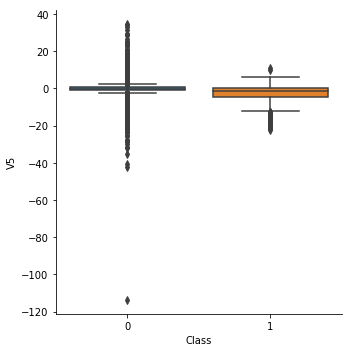

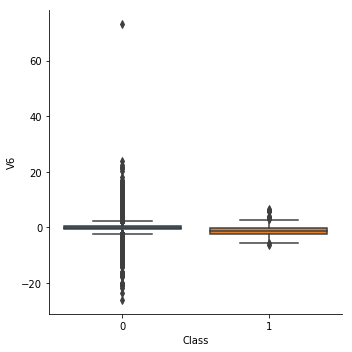

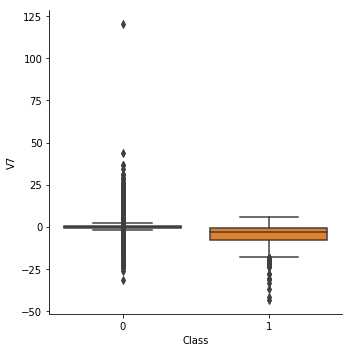

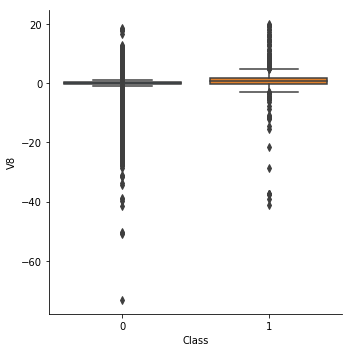

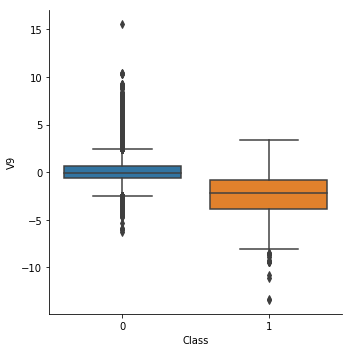

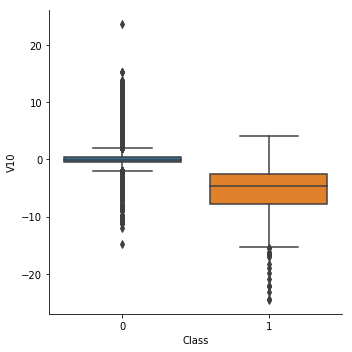

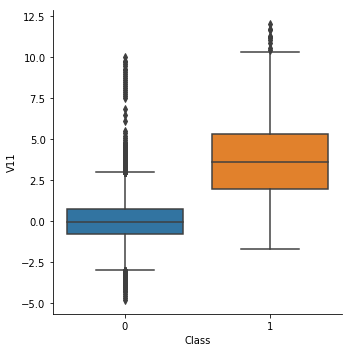

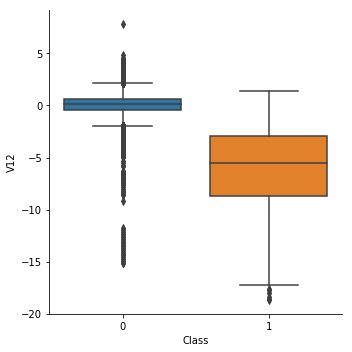

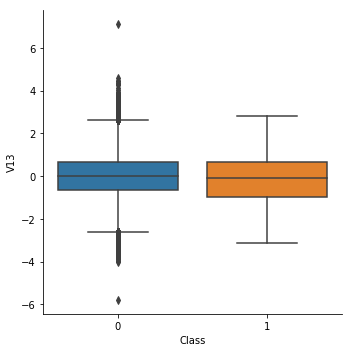

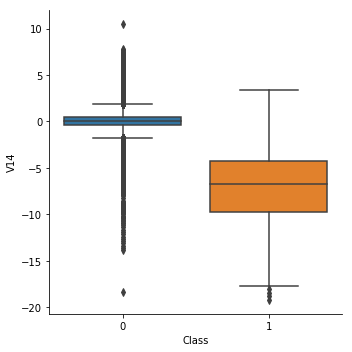

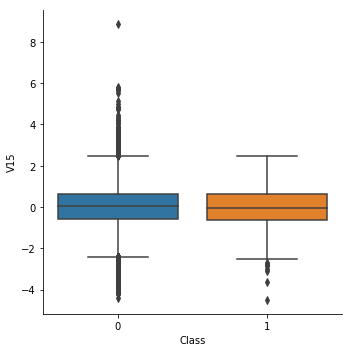

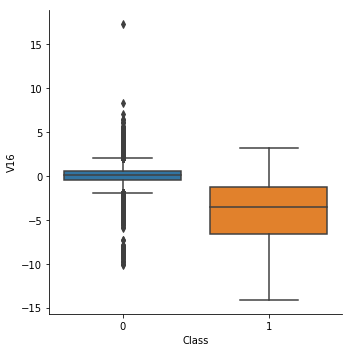

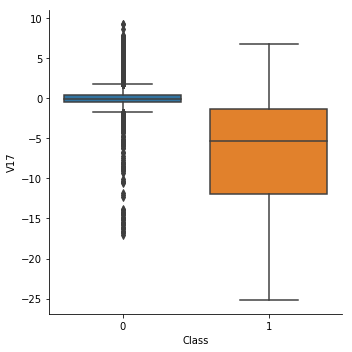

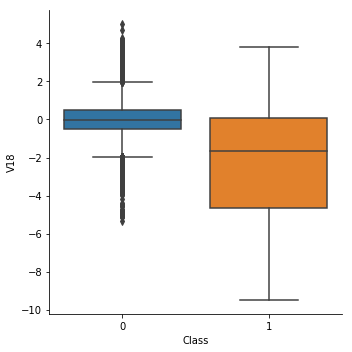

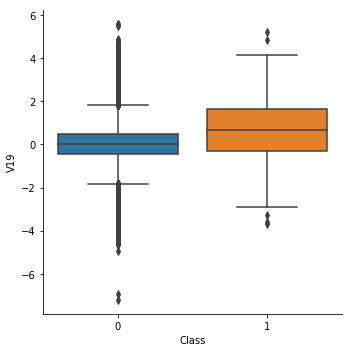

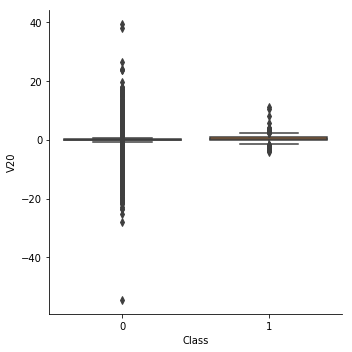

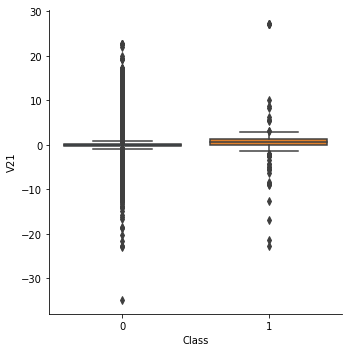

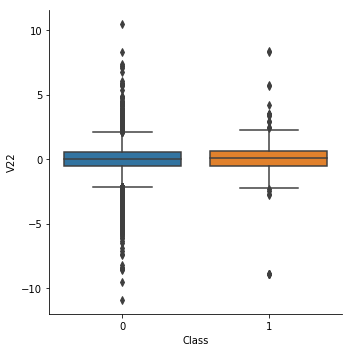

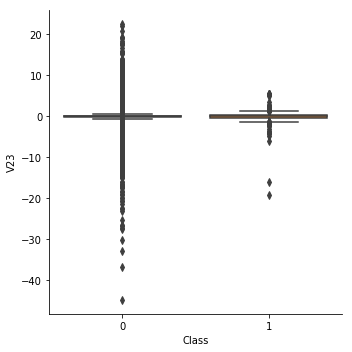

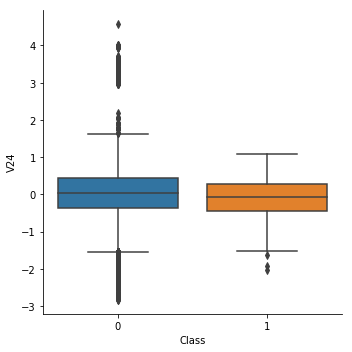

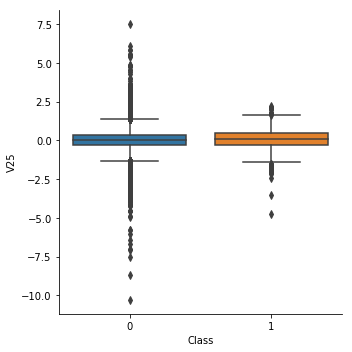

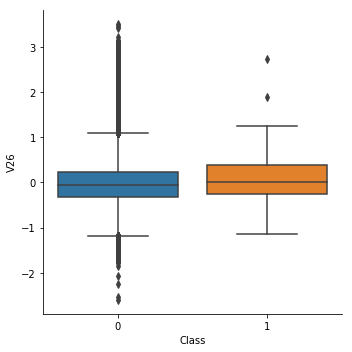

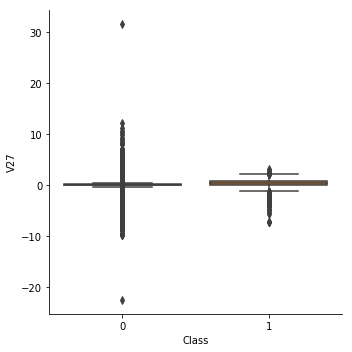

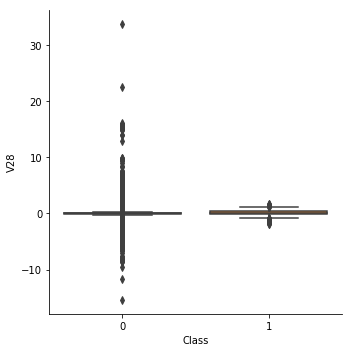

In [9]:
for feature in df.columns.drop('Time').drop('Amount').drop('Class'):
    sns.catplot(x = 'Class', y = feature, data = df,kind='box')

## <font color='red'> Create Sample Subset
Using the original dataframe will cause the following issues:
- **Overfitting**: Our classification models will assume that in most cases there are no frauds! 
- **Wrong Correlations**: Imbalance dataframe is difficult to provide us the information about the relationship between those features. 
- **Trainning model**: Origninal dataframe is too large to train model.
    
<font color='blue'> Create new subset with a 50/50 ratio of fraud and non-fraud transactions.

In [3]:
fraud = list(df.index[df['Class']==1])
len(fraud)

492

In [4]:
import random
nofraud_index = list(df.index[df['Class'] == 0])
samples_num = len(fraud)
nofraud = random.sample(nofraud_index,samples_num)
len(nofraud)

492

In [5]:
sample = fraud + nofraud
len(sample)

984

In [6]:
df_subset = df.loc[sample[:]]
df_subset.sort_index(inplace=True)
df_subset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
282888,171213.0,0.100287,0.485397,0.432883,-0.035366,1.103470,-0.588081,1.000362,-0.463039,-0.339820,...,-0.276963,-0.568471,-0.043022,-0.613969,-0.329577,0.351787,-0.153438,-0.183410,17.99,0
283393,171559.0,-0.682665,1.587776,1.328294,2.896648,1.333589,-0.243256,1.436785,-0.474956,-2.003252,...,0.274317,0.871672,-0.368134,0.066296,0.225206,0.167081,-0.358273,-0.059271,4.58,0
283502,171640.0,1.908729,-0.834447,-0.898066,-0.994946,-0.362037,-0.024207,-0.547270,-0.028518,1.143104,...,0.237802,0.730866,-0.031998,-0.910633,-0.237807,0.736750,-0.045542,-0.055210,88.20,0
283758,171853.0,1.875760,-0.492992,-0.422963,0.945998,-0.083780,1.115446,-0.909360,0.401136,1.036481,...,0.063112,0.176553,0.145299,-0.410805,-0.255184,-0.737808,0.061519,-0.027388,48.79,0
283812,171900.0,1.818723,-0.217277,-1.665345,0.550914,-0.021669,-1.185490,0.278973,-0.319281,0.938357,...,-0.173999,-0.429363,0.099050,-0.109807,-0.099293,-0.097906,-0.019121,-0.003243,110.00,0


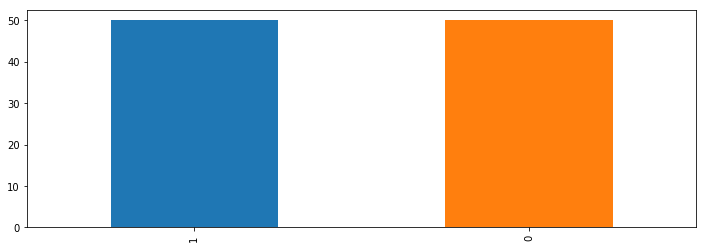

In [7]:
(df_subset.Class.value_counts()/len(df_subset.Class)*100).plot(kind='bar',figsize=(12,4));

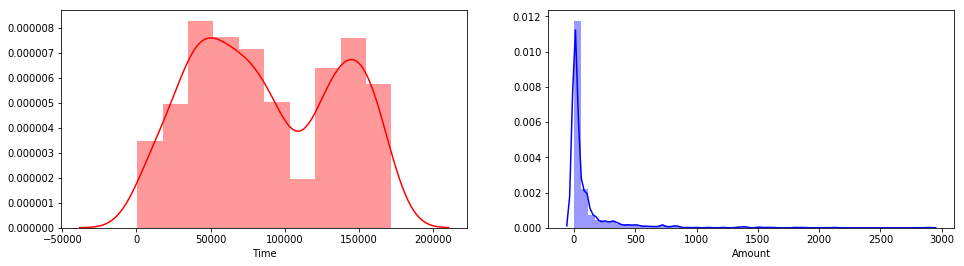

In [8]:
fig,ax = plt.subplots(1,2,figsize=(16,4))

sns.distplot(df_subset['Time'],ax = ax[0], color='r')
sns.distplot(df_subset['Amount'],ax = ax[1], color='b');

## <font color='red'> Model trainning

In [9]:
X = df_subset.iloc[:,:-1].values
y = df_subset['Class'].iloc[:].values

# X = df.iloc[:,:-1].values
# y = df['Class'].iloc[:].values

# X_final = df.iloc[:,:-1].values          # Used for final model scoring
# y_final = df['Class'].iloc[:].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(X_test.shape)

(787, 30)
(787,)
(197, 30)
(197, 30)


In [12]:
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

### <font color='blue'> Output socres and Plot PRC & ROC

In [13]:
# On training set
font = 12
def scores(model,name):
    print('------------- ',name,'------------')
    print('Accuracy score in Training set is:{:.3f}'.format(cross_val_score(model, X_train, y_train, cv=5).mean()))
    print('Precision score is:{:.3f}'.format(precision_score(y_train,model.predict(X_train))))
    print('Recall score is:{:.3f}'.format(recall_score(y_train,model.predict(X_train))))
    print('F1 score is:{:.3f}'.format(f1_score(y_train,model.predict(X_train),average='weighted')))
    print('Jaccard score is:{:.3f}'.format(jaccard_similarity_score(y_train,model.predict(X_train))))
    print('Log loss is:{:.3f}'.format(log_loss(y_train,model.predict(X_train))))
    
    if name in ['DecisionTreeClassifier','KNeighborsClassifier','RandomForestClassifier','VotingClassifier']:
        y_pred = cross_val_predict(model,X_train,y_train,cv=5)
    else:
        y_pred = cross_val_predict(model,X_train,y_train,cv=5,method='decision_function')
    
    precisions, recalls, thresholds = precision_recall_curve(y_train,y_pred)
    fpr,tpr,thresholds = roc_curve(y_train,y_pred)

    plt.figure(figsize=(14,5))
    plt.subplot(141);plt.plot(recalls,precisions,'b--',label = 'PRC');
    plt.fill_between(recalls,precisions, step='post', alpha=0.2,
                 color='#48a6ff');
    plt.xlabel('Recall',size=font);plt.ylabel('Precision',size=font);
    plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.3f}'.format(
          average_precision_score(y_train,y_pred)), fontsize=16);
    plt.legend(loc='best');plt.ylim([0,1.1]);plt.xlim([0,1])
    
    plt.subplot(142);plt.plot(fpr,tpr,'r--',label = 'ROC');
    plt.xlabel('False Positive Rate',size=font);plt.ylabel('True Positive Rate',size=font);
    plt.title('ROC curve: \n Area Under ROC is ={0:0.3f}'.format(
          roc_auc_score(y_train,y_pred)), fontsize=16);
    plt.legend(loc='best');plt.ylim([0,1.1]);plt.xlim([0,1])     

    conf_mx1 = confusion_matrix(y_train,model.predict(X_train))
    plt.subplot(143);plot_confusion_matrix(conf_mx1, classes=['NoFraud','Fraud'],title='Confusion matrix')
    
    conf_mx2 = confusion_matrix(y_test,model.predict(X_test))
    plt.subplot(144);plot_confusion_matrix(conf_mx2, classes=['NoFraud','Fraud'],title='Confusion matrix')

In [14]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## <font color='blue'> Performace for simple model

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

-------------  SGDClassifier ------------
Accuracy score in Training set is:0.914
Precision score is:0.963
Recall score is:0.916
F1 score is:0.940
Jaccard score is:0.940
Log loss is:2.063


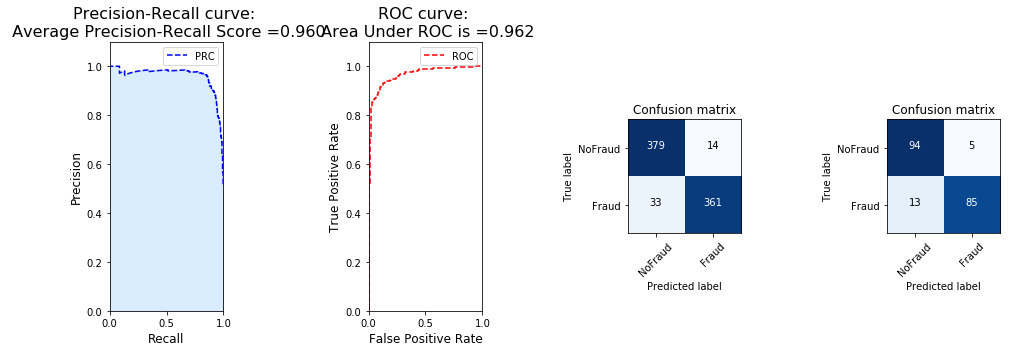

In [34]:
from sklearn.linear_model import SGDClassifier

SGD = make_pipeline(RobustScaler(),
                    SGDClassifier()).fit(X=X_train, y=y_train)

scores(SGD,'SGDClassifier')
# scores(SGD,SGD.__class__.__name__)

-------------  LogisticRegression ------------
Accuracy score in Training set is:0.944
Precision score is:0.979
Recall score is:0.929
F1 score is:0.954
Jaccard score is:0.954
Log loss is:1.580


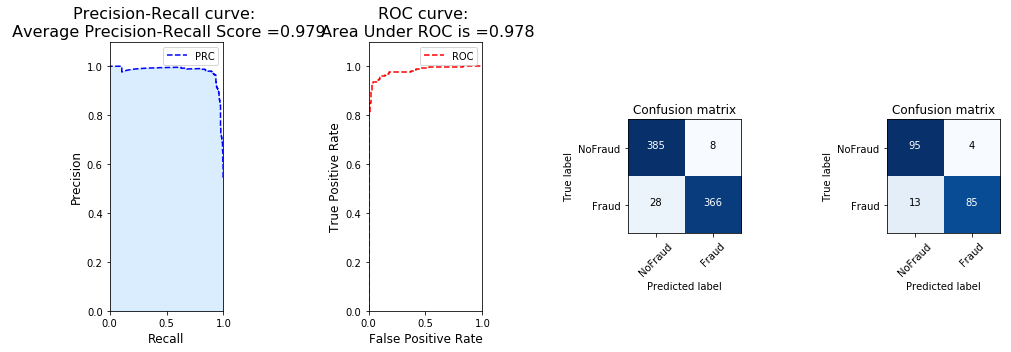

In [17]:
from sklearn.linear_model import LogisticRegression

LR = make_pipeline(RobustScaler(),
                   LogisticRegression()).fit(X=X_train, y=y_train)

scores(LR,'LogisticRegression')

-------------  svc ------------
Accuracy score in Training set is:0.921
Precision score is:0.987
Recall score is:0.929
F1 score is:0.958
Jaccard score is:0.958
Log loss is:1.448


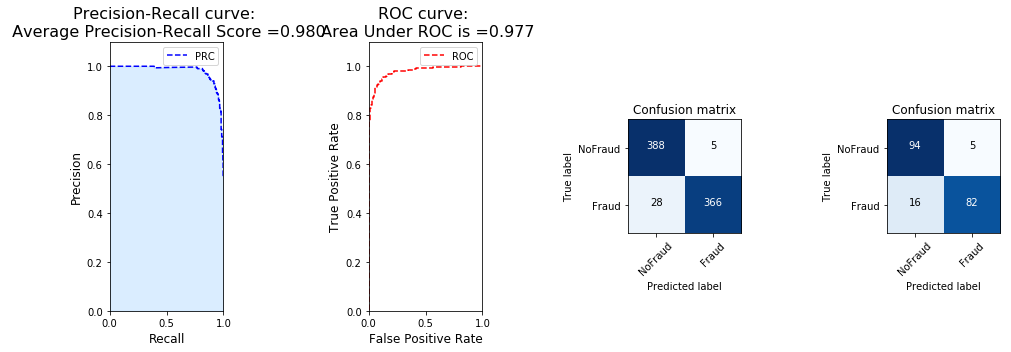

In [18]:
from sklearn.svm import SVC

svc = make_pipeline(RobustScaler(),
                    SVC()).fit(X=X_train, y=y_train)

scores(svc,'svc')

-------------  KNeighborsClassifier ------------
Accuracy score in Training set is:0.919
Precision score is:0.960
Recall score is:0.916
F1 score is:0.939
Jaccard score is:0.939
Log loss is:2.107


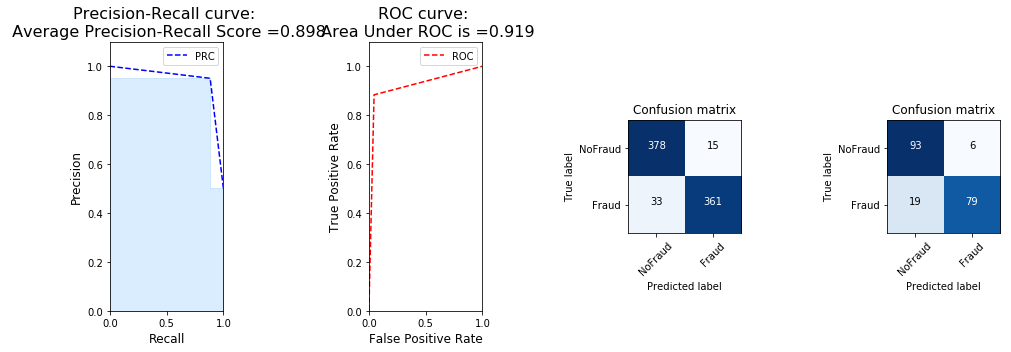

In [19]:
from sklearn.neighbors import KNeighborsClassifier

neigh = make_pipeline(RobustScaler(),
                   KNeighborsClassifier()).fit(X=X_train, y=y_train)

scores(neigh,'KNeighborsClassifier')

-------------  DecisionTreeClassifier ------------
Accuracy score in Training set is:0.919
Precision score is:1.000
Recall score is:1.000
F1 score is:1.000
Jaccard score is:1.000
Log loss is:0.000


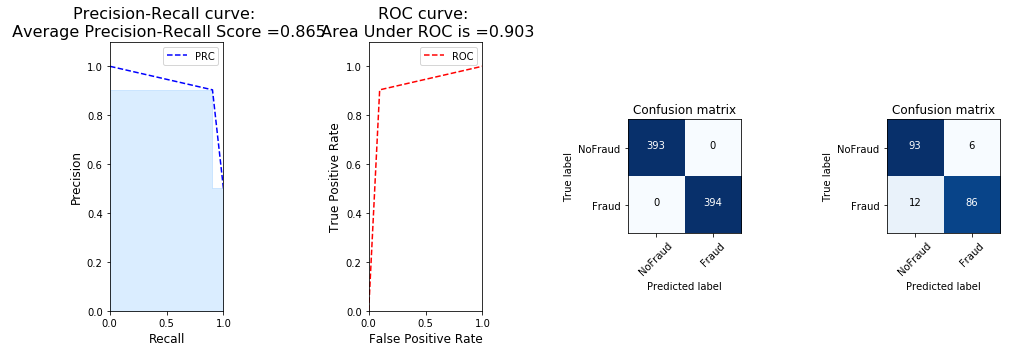

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree = make_pipeline(RobustScaler(),
                   DecisionTreeClassifier()).fit(X=X_train, y=y_train)

scores(tree,'DecisionTreeClassifier')

## <font color='blue'> Ensemble model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


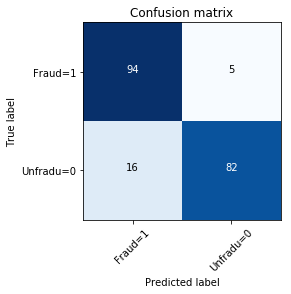

In [22]:
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression()
svm_clf = SVC()
rnd_clf = RandomForestClassifier()

voting_clf = make_pipeline(RobustScaler(), 
            VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
                             voting='hard')).fit(X_train,y_train)

conf_mx = confusion_matrix(y_test,voting_clf.predict(X_test))
plot_confusion_matrix(conf_mx, classes=['Fraud=1','Unfradu=0'],title='Confusion matrix')

## <font color='blue'> GridSearch for parameters

In [23]:
from sklearn.model_selection import GridSearchCV

-------------  SGDClassifier ------------
Accuracy score in Training set is:0.499
Precision score is:0.501
Recall score is:1.000
F1 score is:0.334
Jaccard score is:0.501
Log loss is:17.248


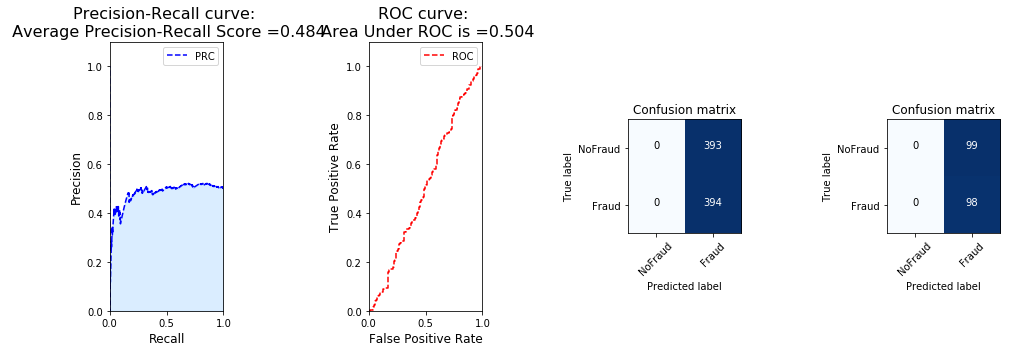

In [35]:
from sklearn.linear_model import SGDClassifier
# SGD Classifier
sgd_clf_params = {"penalty": ['l1', 'l2']}
grid_sgd_clf = GridSearchCV(SGDClassifier(), sgd_clf_params)
grid_sgd_clf.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
sgd_clf = grid_sgd_clf.best_estimator_

scores(sgd_clf,'SGDClassifier')

-------------  LogisticRegression ------------
Accuracy score in Training set is:0.940
Precision score is:0.973
Recall score is:0.916
F1 score is:0.945
Jaccard score is:0.945
Log loss is:1.887


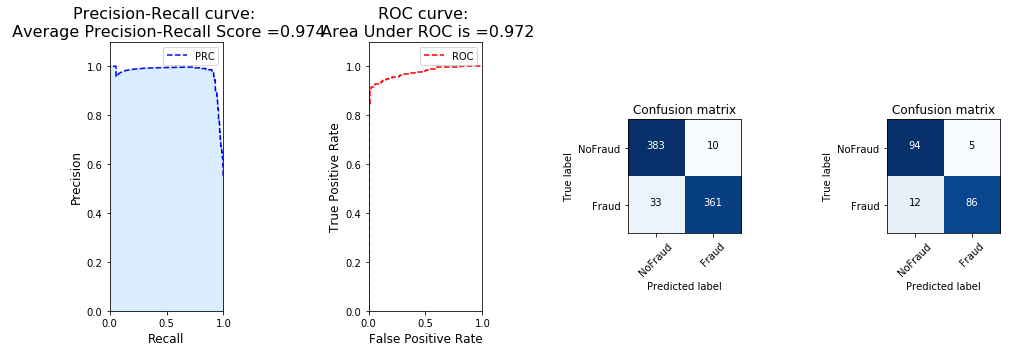

In [36]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression Classifier
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# Logistic Regression best estimator
log_reg = grid_log_reg.best_estimator_

scores(log_reg,log_reg.__class__.__name__)

-------------  KNeighborsClassifier ------------
Accuracy score in Training set is:0.634
Precision score is:1.000
Recall score is:0.665
F1 score is:0.827
Jaccard score is:0.832
Log loss is:5.793


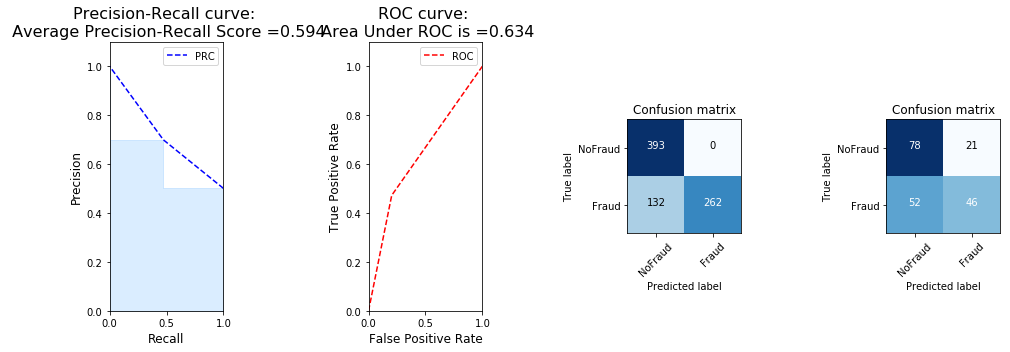

In [37]:
from sklearn.neighbors import KNeighborsClassifier
#K-Nearest Nieghbors Classifier
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

scores(knears_neighbors,knears_neighbors.__class__.__name__)

In [ ]:
from sklearn.svm import SVC
# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
# SVC best estimator
svc_clf = grid_svc.best_estimator_

scores(svc_clf,svc_clf.__class__.__name__)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
# tree best estimator
tree_clf = grid_tree.best_estimator_

scores(tree_clf,tree_clf.__class__.__name__)

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = make_pipeline(RobustScaler(), 
            VotingClassifier(estimators=[('lr',log_clf),('tree',tree_clf),('svc',svc_clf)],
                             voting='hard')).fit(X_train,y_train)

conf_mx = confusion_matrix(y_test,voting_clf.predict(X_test))
plot_confusion_matrix(conf_mx, classes=['Fraud=1','Unfradu=0'],title='Confusion matrix')

print('Precision score is:{:.3f}'.format(precision_score(y_final,voting_clf.predict(X_final))))
print('Recall score is:{:.3f}'.format(recall_score(y_final,voting_clf.predict(X_final))))

## <font color='red'> Test the model
We will test our models on the original testing set. The main goal is to fit the model on the original testing set.

In [ ]:
pred_final = svc_clf.predict(X_final)
conf_mx = confusion_matrix(y_final,pred_final)
plot_confusion_matrix(conf_mx, classes=['NoFraud','fradu=0'],title='Confusion matrix')

print('Precision score is:{:.3f}'.format(precision_score(y_final,pred_final)))
print('Recall score is:{:.3f}'.format(recall_score(y_final,pred_final)))